# 第1回(10/25)　Python, NumPyの使い方

## 1. Pythonの基本
- for文、if文、print文、関数の定義  
- Jupyterの使い方ヒント: 
    - 現在のセルを実行: Shift+Enter
    - 取り消し: command+Z
    - 取り消しの取り消し: command+Shift+Z
    - command+Sでこまめに保存しよう。

### 例: リストaの各要素の絶対値の平均を計算する

In [1]:
a = [2, 7, -5, -3, 4] # 長さ5のリスト


"""方法1"""
s = 0 # 自動的に int 型になる。sum = 0. とピリオドをつけることにより float 型になる。

for i in range(len(a)): # len(a) で range(5)は 0, 1, 2, 3, 4 を順に返す イテラブル (iterable)．len(array) で array の長さを取得．
    # tab/Shift+tabでインデント調節
    if a[i] >= 0:
        s += a[i] # sum = sum + a[i] の意味
    else:
        s -= a[i] # sum = sum - a[i] の意味
        
ave = s/len(a)

print('Average of a is %f' % ave) # float型は%f, int型は%d, 文字は%s
print('Average of a in %.1f' % ave) # 小数第1位まで表示


"""方法2"""
s = 0

for x in a: # a の各要素 x について回る
    s += abs(x)
        
ave = s/len(a)

print('Average of a is {0}'.format(ave)) # float型は%f, int型は%d, 文字は%s


"""方法3(内包表記)"""
ave = sum([abs(x) for x in a])/len(a)
print('Average of a is {0}'.format(ave)) # float型は%f, int型は%d, 文字は%s

Average of a is 4.200000
Average of a in 4.2
Average of a is 4.2
Average of a is 4.2


### 課題1: 任意の長さのリストxに対して、要素の分散を返す関数を定義せよ。

In [2]:
def abs_variance(a):
    ave = sum(a)/len(a)
    var = sum([(x-ave)**2 for x in a])/len(a)
    return var

#### 課題1 答え合わせ

In [3]:
b = [1, -2, 3, -4, 5, -6, -7, 8, 9, -10]

import numpy as np
ans = np.var(np.array(b))
assert abs_variance(b) == ans, 'The variance should be {}'.format(ans)

### 課題2: 識別結果のリスト$Y$と正解データのリスト$T$に対して、正答率を計算する関数accuracy(Y, T)を定義せよ。

In [4]:
def accuracy(Y, T):
    correct = 0
    for y, t in zip(Y, T):
        if y == t:
            correct += 1
    return correct/len(Y)

#### 課題2 答え合わせ

In [5]:
Y = [3, 5, 7, 4, 6, 7, 8, 3, 0, 1, 1, 2, 9, 5, 6, 2, 9, 8, 4, 9]
T      = [3, 5, 6, 5, 6, 7, 8, 3, 0, 0, 1, 1, 9, 4, 2, 2, 9, 8, 4, 7]

ans = np.mean(np.array(Y) == np.array(T))
assert accuracy(Y, T) == ans, 'The score should be {}'.format(ans)

## 2. NumPy の使い方
- pythonの強力な数値計算ライブラリ。
- 行列計算や乱数生成など、様々な数値計算を一発でやってくれる。
- Jupyterの使い方ヒント:
    - 面倒な変数、関数名などは最後まで打たなくても途中まで打ったところでtabを押せば補完or候補を教えてくれる(これはターミナル利用時も使えるテクなので絶対に覚えよう！)
    - 関数のカッコ内でShift+tabを押すとその関数の使い方(引数の入れ方)が分かる。自分で定義した関数でも出来る。

### NumPy のインポート
- 通常 "np" として読み込む。

In [6]:
import numpy as np

### モジュールの利用
- np.以下にいろいろな数値計算のモジュールが入っている。
- モジュールは階層構造になっていることもある。

In [7]:
a = np.array([1, 2, 3, 4, 5]) # numpyの配列。リストとは別物なので注意。
print(np.sum(a)) # aの合計
print(np.average(a)) # aの平均
print(np.var(a)) # aの分散
print(np.std(a)) # aの標準偏差
print(np.linalg.norm(a)) # aの二乗ノルム。linalgは"Linear Algebra" (線形代数)の略。

15
3.0
2.0
1.41421356237
7.4161984871


### 基本的な操作色々

#### ベクトル

In [8]:
a = np.array([1, 2, 3])
print(a)
print(a[0])

a[1] = 4
print(a)

print(a.shape)

[1 2 3]
1
[1 4 3]
(3,)


#### 行列: リストを入れ子にする

In [9]:
a = np.array([
        [1, 2, 3],
        [4, 5, 6]])
print(a)
print(a[1, 2])

a[0, 1] = 7
print(a)

print(a.shape)

[[1 2 3]
 [4 5 6]]
6
[[1 7 3]
 [4 5 6]]
(2, 3)


#### 行・列を取り出す

In [10]:
a = np.array([
        [1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])

print(a[:, 2])
print(a[0, :])

[3 6 9]
[1 2 3]


#### np.arange(n): 連続した数列

In [11]:
a = np.arange(5)
print(a)

b = np.arange(3,7)
print(b)

[0 1 2 3 4]
[3 4 5 6]


#### np.zeros/ones(shape): 要素が全て0/1の行列

In [12]:
print(np.zeros([3, 4]))
print(np.ones([4, 3]))

[[ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]]
[[ 1.  1.  1.]
 [ 1.  1.  1.]
 [ 1.  1.  1.]
 [ 1.  1.  1.]]


#### reshape(new_shape): 行列・ベクトルの形を変える

In [13]:
a = np.arange(12)
print('a:', a)

b = a.reshape(4, 3)
print('b:', b)

a: [ 0  1  2  3  4  5  6  7  8  9 10 11]
b: [[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]


#### 行列とスカラの足し算・掛け算

In [14]:
a = np.arange(4).reshape(2, 2)
print('a:')
print(a)

# 行列 + スカラ
print('a+3:')
print(a+3)

# 行列 x スカラ
print('a*3:')
print(a*3)


a:
[[0 1]
 [2 3]]
a+3:
[[3 4]
 [5 6]]
a*3:
[[0 3]
 [6 9]]


#### 行列と行列の足し算

In [15]:
a = np.arange(4).reshape(2, 2)
print('a:')
print(a)

b = np.ones([2, 2])*3
print('b:')
print(b)

print('a+b:')
print(a+b)

a:
[[0 1]
 [2 3]]
b:
[[ 3.  3.]
 [ 3.  3.]]
a+b:
[[ 3.  4.]
 [ 5.  6.]]


####  行列と行列の足し算: サイズがあっていない場合

In [16]:
a = np.arange(4).reshape(2, 2)
print('a:')
print(a)

b = np.arange(9).reshape(3, 3)
print('b:')
print(b)

print('a+b:')
print(a+b)

a:
[[0 1]
 [2 3]]
b:
[[0 1 2]
 [3 4 5]
 [6 7 8]]
a+b:


ValueError: operands could not be broadcast together with shapes (2,2) (3,3) 

####  行列と行列の足し算: サイズがあっていない場合2

行列の形が合っていない場合も，条件によってはサイズを調節してくれる(broadcast)．以下の場合は shape = (2) の b の先頭に次元を足し (1, 2) とし，さらに要素数が1となっている最初の次元を大きい方 (3) に合わせている．
<img src="figure/broadcast.png", width=400>

In [17]:
a = np.arange(6).reshape(3, 2)
print('a:')
print(a)

b = np.arange(2) + 5
print('b:')
print(b)

print('a+b:')
print(a+b)

a:
[[0 1]
 [2 3]
 [4 5]]
b:
[5 6]
a+b:
[[ 5  7]
 [ 7  9]
 [ 9 11]]


#### 行列と行列の掛け算

In [18]:
a = np.arange(4).reshape(2, 2)
print('a:')
print(a)

b = np.arange(4).reshape(2, 2) + 4
print('b:')
print(b)


print('aとbの行列積')
print(np.dot(a, b))

print('aとbの要素積')
print(a*b)

a:
[[0 1]
 [2 3]]
b:
[[4 5]
 [6 7]]
aとbの行列積
[[ 6  7]
 [26 31]]
aとbの要素積
[[ 0  5]
 [12 21]]


In [19]:
a = np.array([2, 7, -5, -3, 4])
print(a)

a = np.mean(np.abs(a))
print(a)

[ 2  7 -5 -3  4]
4.2


### 例: 該当するラベルのサンプルだけを取り出す

- 予測モデルの精度を測定するためには、データセットを **「モデル構築用のデータ」** と **「テスト用のデータ」** の2つのサブセットに分割する必要がある
- 与えられたラベルを元に、データセットを分割しよう

In [22]:
# データセット。10個のサンプル。１つのサンプルは長さ4のベクトル。
x = np.arange(10)
x = np.array([x, x, x, x])
x = x.T
print('x:')
print(x)

# ラベル。各サンプルがtrain / testのどちらのサンプルなのか。
label = np.array(['train', 'train', 'test', 'test', 'train', 'test', 'train', 'train', 'test', 'test'])


# マスクの作成。
mask_train = (label == 'train')
print('mask:')
print(mask_train)

# マスクを用いて、トレーニングデータだけを取り出す。
x_train = x[mask_train, :]
print('x_train:')
print(x_train)

x:
[[0 0 0 0]
 [1 1 1 1]
 [2 2 2 2]
 [3 3 3 3]
 [4 4 4 4]
 [5 5 5 5]
 [6 6 6 6]
 [7 7 7 7]
 [8 8 8 8]
 [9 9 9 9]]
mask:
[ True  True False False  True False  True  True False False]
x_train:
[[0 0 0 0]
 [1 1 1 1]
 [4 4 4 4]
 [6 6 6 6]
 [7 7 7 7]]


### 課題3: データ行列$X$に対して、重み$W$、バイアス$b$を適用し、活性化関数としてsigmoid関数をかけた結果$Y$を返す関数Linear(X, W, b)を定義せよ。
$$
Y = \sigma (XW+{\bf b})
$$
ただし$\sigma (x)$はsigmoid関数
$$
\sigma(x) = \frac{1} {1+e^{-x}}
$$
- ニューラルネットワークの全結合層における各ユニットではこのような処理を行っています。
- 上の式において、縦棒はスルーしてください。Jupyterの謎仕様により縦棒が入ってしまいます。

In [23]:
def sigmoid(X):
    return (1 + np.exp(-X))**(-1)

def Linear(X, W, b):
    return sigmoid(np.dot(X, W)+b)

#### 課題3 答え合わせ

In [24]:
np.random.seed(100)
X = np.random.random(10)
W = np.random.random(60).reshape(10, 6)
b = np.random.random(6)

ans = np.array([0.96931222, 0.87219875, 0.88491603, 0.94929281, 0.91785733, 0.94358868])
assert np.allclose(Linear(X, W, b), ans), 'The output should be {}'.format(ans)

### 課題4: 2次元行列Xに、2次元のフィルタWを畳み込む関数conv(X, W)を定義せよ。
- Convolutional Neural Networkにおける畳み込み層ではこういう処理を行っています。


<img src="figure/convolution.png", width=600>

In [25]:
def conv(X, W):
    x_h, x_w = X.shape # Xの縦・横サイズ
    w_h, w_w = W.shape # Wの縦・横サイズ

    y_h = x_h - w_h + 1 # WRITE ME! 出力行列Yの縦サイズ
    y_w = x_w - w_w + 1 # WRITE ME! 出力行列Yの横サイズ
    
    Y = np.empty([y_h, y_w])
    
    for i in range(y_h):
        for j in range(y_w):
            # Yのi, j成分の計算
            Y[i, j] = np.sum(X[i:i+w_h, j:j+w_w]*W)# WRITE ME!
    
    return Y

#### 課題4 答え合わせ

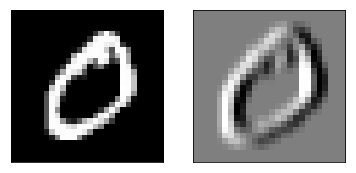

In [26]:
import pickle
with open('X.pkl', 'rb') as f:
    X = pickle.load(f)
    
with open('T.pkl', 'rb') as f:
    T = pickle.load(f)

# X = np.loadtxt('X.txt') # 28x28 array
W = np.array([[-1, 0, 1], 
                 [-2, 0, 2], 
                 [-1, 0, 1]])
Y = conv(X, W)

assert np.allclose(Y, T), 'The output should be {}'.format(T)

# 結果を画像として表示
% matplotlib inline 
import matplotlib.pylab as plt 

fig = plt.figure(figsize=(6, 3))
ax = fig.add_subplot(1, 2, 1, xticks=[], yticks=[])
ax.imshow(X, cmap='gray', interpolation='none')
ax = fig.add_subplot(1, 2, 2, xticks=[], yticks=[])
ax.imshow(Y, cmap='gray', interpolation='none')

- 実は上で用いたWは鉛直方向のsoberフィルタでした。結果から、鉛直方向のエッジが抽出されているのが分かると思います。

## 3. クラス(Class)の定義
- オブジェクト指向型プログラミング
- 複雑なモデルを作成するためには必須

### 例: 学生を作る
- 学生は名前、性別、学年、趣味の4つのパラメータを持っている
- 学生は自己紹介ができる
- 学年と趣味は後から変えられる

#### ★ 学生一人ひとりを作るのではなく、学生の「型」を作る

In [48]:
# 学生の「型」
class Student:
    # 学生作成時に実行される関数
    def __init__(self, name, grade, hobby, sex='Male'):
        self.name = name
        self.grade = grade
        self.hobby = hobby
        self.sex = sex
        
    # 自己紹介機能。性別によって一人称が変わるようにしてある。語尾を指定できる。
    def self_introduction(self, gobi='です'):
        print(self.sex)
        assert 'Male' in ['Male', 'Female'], 'Sex should be Male or Female (in this hands-on)'
        subject = '僕' if self.sex == 'Male' else '私'
        message = '{0}は{1}の{2}{3}．趣味は{4}{3}'.format(subject, self.grade, self.name, gobi, self.hobby)
        print(message)
        
    # 学年を変える機能
    def update_grade(self, grade):
        self.grade = grade
        
    # 趣味を変える機能
    def update_hobby(self, hobby):
        self.hobby = hobby

In [49]:
# 型を用いてtokozumeという学生を作成
tokozume = Student('荒瀬', 'M1', 'スノーボード', 'Male')

# 作成時点でinit関数が実行され、パラメータがself.name, self.sex, self.grade, self.hobbyに保存される。
# self.〜としたものは、tokozume.〜で参照できる。
print(tokozume.name, tokozume.grade, tokozume.hobby, tokozume.sex)

荒瀬 M1 スノーボード Male


In [50]:
# tokozumeに自己紹介をさせる
tokozume.self_introduction()
tokozume.self_introduction('でござるよ')

Male
僕はM1の荒瀬です．趣味はスノーボードです
Male
僕はM1の荒瀬でござるよ．趣味はスノーボードでござるよ


In [52]:
# tokozumeの学年と趣味を変える
tokozume.update_grade('M2')
tokozume.update_hobby('ありません')

# もう一度自己紹介させる
tokozume.self_introduction('でござるよ')

Male
僕はM2の荒瀬でござるよ．趣味はありませんでござるよ


### なぜDeep Learningでよく使うのか？？
- ニューラルネットワークは、畳み込み層や全結合層の積み重ね。何十層、何百層になることも。
- その1つ1つが、異なる形状や重みパラメータを持っている。

#### ★ 1つ1つの層の関数を作るのではなく、畳み込み層や全結合層の「型」だけを作れば、実装しやすい。

### 課題5: 適当なクラスを使って遊んでみよう

In [ ]:
# WRITE ME!